In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv"
df = pd.read_csv(url, sep='\t')

In [3]:
df.head(20)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [4]:
# Filter data for the years 1952 and 1957
years = [1952, 1957]
df = df[df['year'].isin(years)]

In [5]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
12,Albania,Europe,1952,55.230,1282697,1601.056136
13,Albania,Europe,1957,59.280,1476505,1942.284244
24,Algeria,Africa,1952,43.077,9279525,2449.008185
...,...,...,...,...,...,...
1669,"Yemen, Rep.",Asia,1957,33.970,5498090,804.830455
1680,Zambia,Africa,1952,42.038,2672000,1147.388831
1681,Zambia,Africa,1957,44.077,3016000,1311.956766
1692,Zimbabwe,Africa,1952,48.451,3080907,406.884115


In [ ]:
# Calculate average gdp, per continent, per year
df = df.groupby(['continent', 'year'])['gdpPercap'].mean().unstack()

In [7]:
df

year,1952,1957
continent,,
Africa,1252.572466,1385.236062
Americas,4079.062552,4616.043733
Asia,5195.484004,5787.732940
Europe,5661.057435,6963.012816
Oceania,10298.085650,11598.522455


In [12]:
def add_label(continent_name, year):
    
    # Calculate value (and round it)
    y_position = round(df[year][continent_name])
    
    # Determine x_position depending on the year  
    if year==1952:
        x_position = year - 1.2
    else:
        x_position = year + 0.12
    
    # Adding the text
    plt.text(x_position, # x-axis position
             y_position, #y-axis position
             f'{continent_name}, {y_position}', # Text
             fontsize=8, # Text size
             color='black', # Text color
            ) 

In [10]:
for continent_name in df.index:
    for year in df.columns:
        print(continent_name, year)
          

Africa 1952
Africa 1957
Americas 1952
Americas 1957
Asia 1952
Asia 1957
Europe 1952
Europe 1957
Oceania 1952
Oceania 1957


C:\Users\dqthi\AppData\Local\Temp\ipykernel_35512\1800042741.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value_before = df[df.index==continent][years[0]][0] #gdp/cap of the continent in 1952
C:\Users\dqthi\AppData\Local\Temp\ipykernel_35512\1800042741.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value_after = df[df.index==continent][years[1]][0] #gdp/cap of the continent in 1957


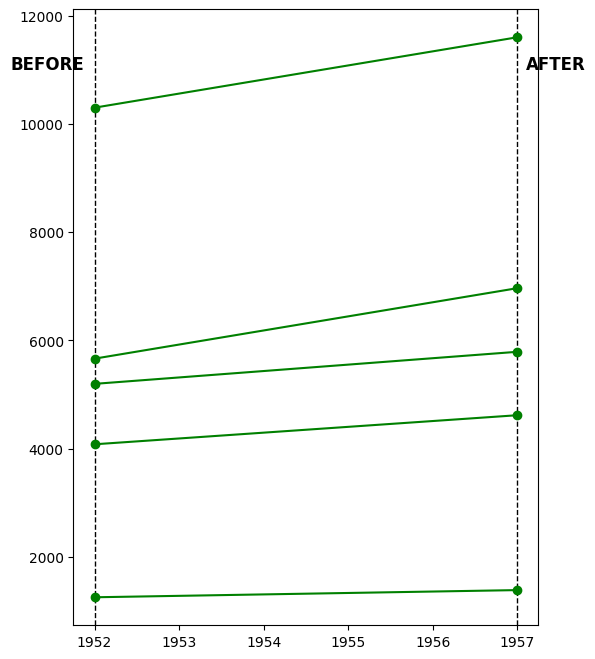

In [ ]:
# Set figsize
plt.figure(figsize=(6, 8))

# Vertical lines for the years
plt.axvline(x=years[0], color='black', linestyle='--', linewidth=1) # 1952
plt.axvline(x=years[1], color='black', linestyle='--', linewidth=1) # 1957

# Add the BEFORE and AFTER
plt.text(1951, 11000, 'BEFORE', fontsize=12, color='black', fontweight='bold')
plt.text(1957.1, 11000, 'AFTER', fontsize=12, color='black', fontweight='bold')

# Plot the line for each continent
for continent in df.index:
    
    # Color depending on the evolution
    value_before = df[df.index==continent][years[0]][0] #gdp/cap of the continent in 1952
    value_after = df[df.index==continent][years[1]][0] #gdp/cap of the continent in 1957
    
    # Red if the value has decreased, green otherwise
    if value_before > value_after:
        color='red'
    else:
        color='green'
    
    # Add the line to the plot
    plt.plot(years, df.loc[continent], marker='o', label=continent, color=color)

plt.show()

C:\Users\dqthi\AppData\Local\Temp\ipykernel_35512\837379090.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value_before = df[df.index==continent][years[0]][0] #gdp/cap of the continent in 1952
C:\Users\dqthi\AppData\Local\Temp\ipykernel_35512\837379090.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value_after = df[df.index==continent][years[1]][0] #gdp/cap of the continent in 1957


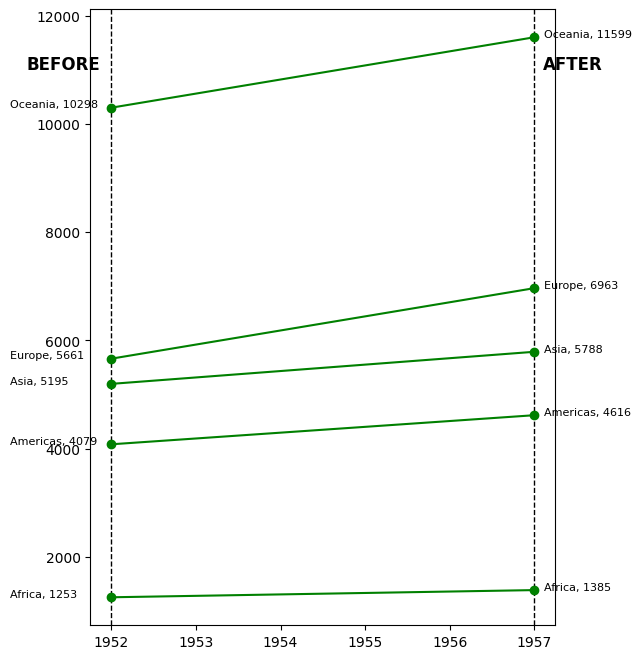

In [13]:
# Set figsize
plt.figure(figsize=(6, 8))

# Vertical lines for the years
plt.axvline(x=years[0], color='black', linestyle='--', linewidth=1) # 1952
plt.axvline(x=years[1], color='black', linestyle='--', linewidth=1) # 1957

# Add the BEFORE and AFTER
plt.text(1951, 11000, 'BEFORE', fontsize=12, color='black', fontweight='bold')
plt.text(1957.1, 11000, 'AFTER', fontsize=12, color='black', fontweight='bold')

# Plot the line for each continent
for continent in df.index:
    
    # Color depending on the evolution
    value_before = df[df.index==continent][years[0]][0] #gdp/cap of the continent in 1952
    value_after = df[df.index==continent][years[1]][0] #gdp/cap of the continent in 1957
    
    # Red if the value has decreased, green otherwise
    if value_before > value_after:
        color='red'
    else:
        color='green'
    
    # Add the line to the plot
    plt.plot(years, df.loc[continent], marker='o', label=continent, color=color)

# Add label of each continent at each year
for continent_name in df.index:
    for year in df.columns:
        add_label(continent_name, year)


plt.show()

C:\Users\dqthi\AppData\Local\Temp\ipykernel_35512\230268955.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value_before = df[df.index==continent][years[0]][0] #gdp/cap of the continent in 1952
C:\Users\dqthi\AppData\Local\Temp\ipykernel_35512\230268955.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value_after = df[df.index==continent][years[1]][0] #gdp/cap of the continent in 1957


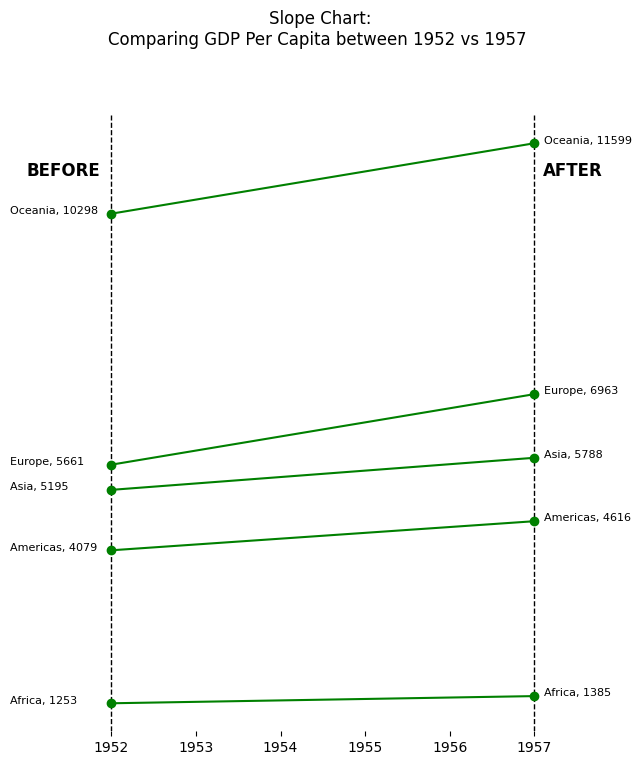

In [14]:
# Set figsize
plt.figure(figsize=(6, 8))

# Vertical lines for the years
plt.axvline(x=years[0], color='black', linestyle='--', linewidth=1) # 1952
plt.axvline(x=years[1], color='black', linestyle='--', linewidth=1) # 1957

# Add the BEFORE and AFTER
plt.text(1951, 11000, 'BEFORE', fontsize=12, color='black', fontweight='bold')
plt.text(1957.1, 11000, 'AFTER', fontsize=12, color='black', fontweight='bold')

# Plot the line for each continent
for continent in df.index:
    
    # Color depending on the evolution
    value_before = df[df.index==continent][years[0]][0] #gdp/cap of the continent in 1952
    value_after = df[df.index==continent][years[1]][0] #gdp/cap of the continent in 1957
    
    # Red if the value has decreased, green otherwise
    if value_before > value_after:
        color='red'
    else:
        color='green'
    
    # Add the line to the plot
    plt.plot(years, df.loc[continent], marker='o', label=continent, color=color)

# Add label of each continent at each year
for continent_name in df.index:
    for year in df.columns:
        add_label(continent_name, year)

# Add a title ('\n' allow us to jump lines)
plt.title(f'Slope Chart: \nComparing GDP Per Capita between {years[0]} vs {years[1]}  \n\n\n') 

plt.yticks([]) # Remove y-axis
plt.box(False) # Remove the bounding box around plot

plt.show()

In [15]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on 

In [17]:
df

year,1952,1957
continent,,
Africa,1252.572466,1385.236062
Americas,4079.062552,4616.043733
Asia,5195.484004,5787.732940
Europe,5661.057435,6963.012816
Oceania,10298.085650,11598.522455


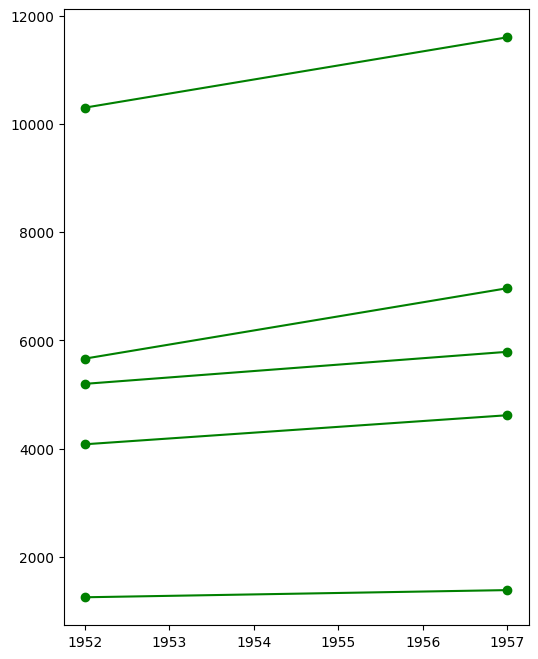

In [24]:
# Set figsize
plt.figure(figsize=(6, 8))
# Plot the line for each continent
for continent in df.index:
    
    # # Color depending on the evolution
    # value_before = df[df.index==continent][years[0]][0] #gdp/cap of the continent in 1952
    # value_after = df[df.index==continent][years[1]][0] #gdp/cap of the continent in 1957
    
    # # Red if the value has decreased, green otherwise
    # if value_before > value_after:
    #     color='red'
    # else:
    #     color='green'

    plt.plot(years, df.loc[continent], marker='o', label=continent, color=color)

plt.show()

In [21]:
years

[1952, 1957]

In [22]:
df.loc[continent]

year
1952    10298.085650
1957    11598.522455
Name: Oceania, dtype: float64

In [25]:
for continent in df.index:
    print (years, df.loc[continent])

[1952, 1957] year
1952    1252.572466
1957    1385.236062
Name: Africa, dtype: float64
[1952, 1957] year
1952    4079.062552
1957    4616.043733
Name: Americas, dtype: float64
[1952, 1957] year
1952    5195.484004
1957    5787.732940
Name: Asia, dtype: float64
[1952, 1957] year
1952    5661.057435
1957    6963.012816
Name: Europe, dtype: float64
[1952, 1957] year
1952    10298.085650
1957    11598.522455
Name: Oceania, dtype: float64
